# Using Rigol Class to control oscilloscope

In [2]:
from __future__ import division
import matplotlib.pyplot as plt
import numpy as np
import rigol
# initialize and set backend to usbtmc
r = rigol.Rigol("usbtmc")

1: Rigol Technologies          - DS1000 SERIES                   
Enter the number of the device you want to connect to: 1
Asking *IDN? returns: Rigol Technologies,DS1102E,DS1EB142004074,00.03.01.00.00


### Query the waveform intensity

##### Let's take a look at some of the methods in the Rigol class

In [2]:
help(r)

Help on instance of Rigol in module rigol:

class Rigol
 |  Methods defined here:
 |  
 |  __init__(self, backend, idProduct=None, idVendor=None)
 |  
 |  acquireAverages(self, count)
 |      The commands set the average numbers in Average mode. <count>
 |      could be and integer of 2 times the power of N within 2 and 256.
 |  
 |  acquireMemDepth(self, depth)
 |      The commands set and query the memory depth of the oscilloscope. <depth>
 |      could be LONG (long memory) or NORMal (normal memory)
 |  
 |  acquireMode(self, mode)
 |      The commands set the current acquire mode of the oscilloscope.
 |      <mode> could be RTIM (Real time Sampling) or ETIM (Equivalent Sampling).
 |  
 |  acquireType(self, typ)
 |      The commands set the current acquire type of the oscilloscope.
 |      <type> could be NORM, AVER or PEAK.
 |  
 |  askAcquireAverages(self)
 |      The query returns 2, 4, 8, 16, 32, 64, 128 or 256.
 |  
 |  askAcquireMemDepth(self)
 |      The query returns LONG or

Do note that I'm writing all of these methods so that the oscilloscope can be controlled without looking at the programmers manual at all, but you can always write in your own commands (in case I have not implemented them) by using the Rigol.dev.write() or Rigol.dev.ask() methods.

### Basic Methods

In [3]:
r.stop()

In [2]:
r.auto()

In [5]:
r.run()

### Display Methods

In [6]:
r.askIntensity()

u'32'

Set intensity to 32.

In [7]:
r.intensity(32)

### Trigger Methods

Set trigger source for CHAN1 to EDGE

In [8]:
r.triggerSource("EDGE", "CHAN1")

Query trigger source for edge

In [9]:
r.askTriggerSource("EDGE")

u'CH1'

### Channel Methods

Turn on channel 2 and then turn it off

In [3]:
r.channelDisplay(2)

In [4]:
r.channelDisplay(2, on=False)

Turn on channel 1

In [5]:
r.channelDisplay(1)

Set channel scale

In [28]:
r.channelScale(1, 1)

In [29]:
r.askChannelScale(1)

u'1.000e+00'

You can also access the volt1_scale attribute (Updated everytime you send the channelScale() method)

In [30]:
r.volt1_scale

u'1.000e+00'

### Measure Methods

Measure peak to peak voltage

In [7]:
r.measureVpp(1)

u'6.24e+00'

### Key Methods

Unlock the buttons on the oscilloscope
Note:  The next time you send a usb command or query, the keys will relock

In [16]:
r.keyLock(enable=False)

### TimeBase Methods

Set a time scale in sec/division

In [25]:
r.timebaseScale(5e-3)

Ask for the time scale in sec/division

In [26]:
r.askTimebaseScale()

u'5.000e-03'

There is also an attribute you can look up without querying the oscilloscope.  (Potentially faster)
This attribute will update every time you send the timebaseScale() method to the oscilloscope.

In [27]:
r.time_scale

u'5.000e-03'

### Waveform Methods

plot something

In [3]:
% matplotlib inline

In [42]:
r.run()

In [4]:
r.waveformPointsMode("NORM")

In [12]:
x = r.getTimebase()

In [13]:
y = r.getWaveform("CHAN1")

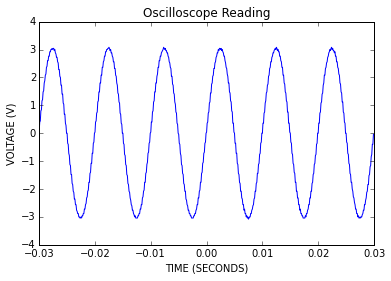

In [59]:
plt.plot(x, y)
plt.xlabel("TIME (SECONDS)")
plt.ylabel("VOLTAGE (V)")
plt.title("Oscilloscope Reading")